Getting Started With Activation Functions @https://github.com/Amruth-Sai-Mudivarthi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_val,y_val)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 65s 0us/step


In [3]:
y_train_flattened = y_train.flatten()

In [4]:
unique=set(y_train_flattened)
print(unique)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


[]

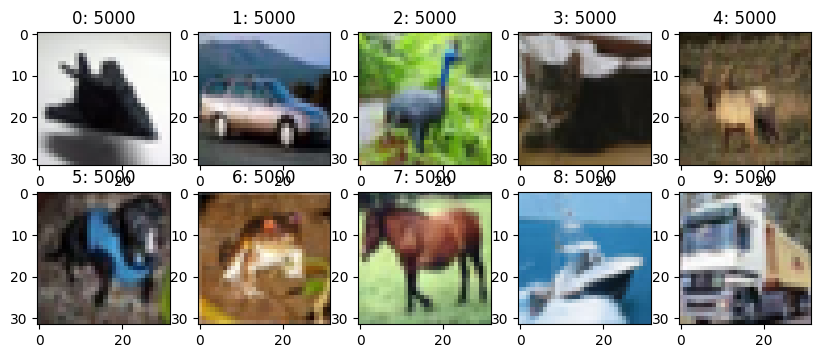

In [5]:
plt.figure(figsize=(10,10))
i=1
for label in unique:
  image=X_train[y_train_flattened.tolist().index(label)]
  plt.subplot(5,5,i)
  plt.axis='off'
  i=i+1
  plt.title(f"{label}: {y_train_flattened.tolist().count(label)}")
  _=plt.imshow(image)
plt.plot()



In [6]:
print(X_val)
print(y_val)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [7]:
X_train=X_train.astype('float32')/255
X_val=X_val.astype('float32')/255

In [8]:
print(X_val)

[[[[0.61960787 0.4392157  0.19215687]
   [0.62352943 0.43529412 0.18431373]
   [0.64705884 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254903 0.14117648]
   [0.49411765 0.35686275 0.14117648]
   [0.45490196 0.33333334 0.12941177]]

  [[0.59607846 0.4392157  0.2       ]
   [0.5921569  0.43137255 0.15686275]
   [0.62352943 0.44705883 0.1764706 ]
   ...
   [0.53333336 0.37254903 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509805 0.13333334]]

  [[0.5921569  0.43137255 0.18431373]
   [0.5921569  0.42745098 0.12941177]
   [0.61960787 0.43529412 0.14117648]
   ...
   [0.54509807 0.38431373 0.13333334]
   [0.50980395 0.37254903 0.13333334]
   [0.47058824 0.34901962 0.12941177]]

  ...

  [[0.26666668 0.4862745  0.69411767]
   [0.16470589 0.39215687 0.5803922 ]
   [0.12156863 0.34509805 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254905]
   [0.05098039 0.2509804  0.42352942]
   [0.15686275 0.33333334 0.49803922]]

  [[0.23921569 0.45490196 0.65882355]
   [0.1

In [9]:
n=10
y_train=to_categorical(y_train,n)
y_val=to_categorical(y_val,n)
print(y_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [10]:
X_train = np.reshape(X_train, (50000, 32 * 32 * 3))
X_val = np.reshape(X_val, (10000, 32 * 32 * 3))
X_train.shape

(50000, 3072)

In [14]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(1500, input_dim=3072, activation='sigmoid'))
model_sigmoid.add(Dense(1500, activation='sigmoid'))
model_sigmoid.add(Dense(1500, activation='sigmoid'))
model_sigmoid.add(Dense(1500, activation='sigmoid'))
model_sigmoid.add(Dense(1500, activation='sigmoid'))
model_sigmoid.add(Dense(1500, activation='sigmoid'))
model_sigmoid.add(Dense(900, activation='sigmoid'))
model_sigmoid.add(Dense(200, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))

In [15]:
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [13]:
model_relu = Sequential()
model_relu.add(Dense(1500, input_dim=3072, activation='relu'))
model_relu.add(Dense(1500, activation='relu'))
model_relu.add(Dense(1500, activation='relu'))
model_relu.add(Dense(1500, activation='relu'))
model_relu.add(Dense(1500, activation='relu'))
model_relu.add(Dense(1500, activation='relu'))
model_relu.add(Dense(900, activation='relu'))
model_relu.add(Dense(200, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))

In [19]:
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
model_elu = Sequential()
model_elu.add(Dense(1500, input_dim=3072, activation='elu'))
model_elu.add(Dense(1500, activation='elu'))
model_elu.add(Dense(1500, activation='elu'))
model_elu.add(Dense(1500, activation='elu'))
model_elu.add(Dense(1500, activation='elu'))
model_elu.add(Dense(1500, activation='elu'))
model_elu.add(Dense(900, activation='elu'))
model_elu.add(Dense(200, activation='elu'))
model_elu.add(Dense(10, activation='softmax'))

c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_elu.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [22]:
model_selu = Sequential()
model_selu.add(Dense(1500, input_dim=3072, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(900, activation='selu'))
model_selu.add(Dense(200, activation='selu'))
model_selu.add(Dense(10, activation='softmax'))

In [23]:
model_selu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
model_gelu = Sequential()
model_gelu.add(Dense(1500, input_dim=3072, activation='gelu'))
model_gelu.add(Dense(1500, activation='gelu'))
model_gelu.add(Dense(1500, activation='gelu'))
model_gelu.add(Dense(1500, activation='gelu'))
model_gelu.add(Dense(1500, activation='gelu'))
model_gelu.add(Dense(1500, activation='gelu'))
model_gelu.add(Dense(900, activation='gelu'))
model_gelu.add(Dense(200, activation='gelu'))
model_gelu.add(Dense(10, activation='softmax'))

In [25]:
model_gelu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [36]:
model_tanh = Sequential()
model_tanh.add(Dense(1500, input_dim=3072, activation='tanh'))
model_tanh.add(Dense(1500, activation='tanh'))
model_tanh.add(Dense(1500, activation='tanh'))
model_tanh.add(Dense(1500, activation='tanh'))
model_tanh.add(Dense(1500, activation='tanh'))
model_tanh.add(Dense(1500, activation='tanh'))
model_tanh.add(Dense(900, activation='tanh'))
model_tanh.add(Dense(200, activation='tanh'))
model_tanh.add(Dense(10, activation='softmax'))

c:\Users\M Amruth Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model_tanh.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [30]:
n_epochs = 10
batch_size = 1000
validation_split = 0.2
history_sigmoid = history_loss()

In [31]:
model_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_sigmoid],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 22s - 552ms/step - accuracy: 0.1013 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3030
Epoch 2/10
40/40 - 18s - 459ms/step - accuracy: 0.0986 - loss: 2.3029 - val_accuracy: 0.0952 - val_loss: 2.3031
Epoch 3/10
40/40 - 19s - 468ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 4/10
40/40 - 20s - 493ms/step - accuracy: 0.0992 - loss: 2.3029 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 5/10
40/40 - 19s - 481ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3030
Epoch 6/10
40/40 - 18s - 445ms/step - accuracy: 0.0991 - loss: 2.3029 - val_accuracy: 0.0977 - val_loss: 2.3027
Epoch 7/10
40/40 - 20s - 508ms/step - accuracy: 0.0988 - loss: 2.3029 - val_accuracy: 0.0977 - val_loss: 2.3028
Epoch 8/10
40/40 - 20s - 502ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 9/10
40/40 - 20s - 501ms/step - accuracy: 0.0983 - loss: 2.3029 - val_accuracy: 0.0952 - val_loss:

In [32]:
history_relu = history_loss()
model_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_relu],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 41s - 1s/step - accuracy: 0.3415 - loss: 1.8588 - val_accuracy: 0.3363 - val_loss: 1.8712
Epoch 2/10
40/40 - 39s - 963ms/step - accuracy: 0.3445 - loss: 1.8439 - val_accuracy: 0.3436 - val_loss: 1.8392
Epoch 3/10
40/40 - 30s - 753ms/step - accuracy: 0.3575 - loss: 1.8101 - val_accuracy: 0.3455 - val_loss: 1.8299
Epoch 4/10
40/40 - 28s - 711ms/step - accuracy: 0.3573 - loss: 1.8091 - val_accuracy: 0.3528 - val_loss: 1.8087
Epoch 5/10
40/40 - 29s - 731ms/step - accuracy: 0.3652 - loss: 1.7872 - val_accuracy: 0.3313 - val_loss: 1.8968
Epoch 6/10
40/40 - 32s - 799ms/step - accuracy: 0.3692 - loss: 1.7715 - val_accuracy: 0.3720 - val_loss: 1.7675
Epoch 7/10
40/40 - 30s - 752ms/step - accuracy: 0.3717 - loss: 1.7788 - val_accuracy: 0.3819 - val_loss: 1.7596
Epoch 8/10
40/40 - 35s - 864ms/step - accuracy: 0.3754 - loss: 1.7537 - val_accuracy: 0.3659 - val_loss: 1.7892
Epoch 9/10
40/40 - 29s - 736ms/step - accuracy: 0.3829 - loss: 1.7386 - val_accuracy: 0.3849 - val_loss: 1.

In [33]:
history_selu = history_loss()
model_selu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_selu],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 12s - 312ms/step - accuracy: 0.3589 - loss: 1.7939 - val_accuracy: 0.3363 - val_loss: 1.8673
Epoch 2/10
40/40 - 11s - 283ms/step - accuracy: 0.3824 - loss: 1.7376 - val_accuracy: 0.3398 - val_loss: 1.8778
Epoch 3/10
40/40 - 11s - 284ms/step - accuracy: 0.3826 - loss: 1.7450 - val_accuracy: 0.3833 - val_loss: 1.7446
Epoch 4/10
40/40 - 12s - 301ms/step - accuracy: 0.3974 - loss: 1.6972 - val_accuracy: 0.3825 - val_loss: 1.7133
Epoch 5/10
40/40 - 13s - 313ms/step - accuracy: 0.4048 - loss: 1.6859 - val_accuracy: 0.3628 - val_loss: 1.7875
Epoch 6/10
40/40 - 13s - 324ms/step - accuracy: 0.4081 - loss: 1.6682 - val_accuracy: 0.3869 - val_loss: 1.7121
Epoch 7/10
40/40 - 13s - 322ms/step - accuracy: 0.4118 - loss: 1.6526 - val_accuracy: 0.3989 - val_loss: 1.6861
Epoch 8/10
40/40 - 11s - 287ms/step - accuracy: 0.4252 - loss: 1.6266 - val_accuracy: 0.3780 - val_loss: 1.7251
Epoch 9/10
40/40 - 12s - 290ms/step - accuracy: 0.4276 - loss: 1.6124 - val_accuracy: 0.4030 - val_loss:

In [28]:
history_gelu = history_loss()
model_gelu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_gelu],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 22s - 541ms/step - accuracy: 0.1208 - loss: 2.3025 - val_accuracy: 0.1298 - val_loss: 2.3022
Epoch 2/10
40/40 - 16s - 409ms/step - accuracy: 0.1227 - loss: 2.3018 - val_accuracy: 0.1224 - val_loss: 2.3016
Epoch 3/10
40/40 - 16s - 398ms/step - accuracy: 0.1214 - loss: 2.3012 - val_accuracy: 0.1150 - val_loss: 2.3009
Epoch 4/10
40/40 - 16s - 411ms/step - accuracy: 0.1164 - loss: 2.3006 - val_accuracy: 0.1141 - val_loss: 2.3002
Epoch 5/10
40/40 - 22s - 543ms/step - accuracy: 0.1113 - loss: 2.2999 - val_accuracy: 0.1122 - val_loss: 2.2995
Epoch 6/10
40/40 - 22s - 538ms/step - accuracy: 0.1094 - loss: 2.2991 - val_accuracy: 0.1123 - val_loss: 2.2987
Epoch 7/10
40/40 - 21s - 514ms/step - accuracy: 0.1094 - loss: 2.2983 - val_accuracy: 0.1124 - val_loss: 2.2978
Epoch 8/10
40/40 - 20s - 492ms/step - accuracy: 0.1099 - loss: 2.2973 - val_accuracy: 0.1127 - val_loss: 2.2968
Epoch 9/10
40/40 - 20s - 500ms/step - accuracy: 0.1110 - loss: 2.2963 - val_accuracy: 0.1126 - val_loss:

In [34]:
history_elu = history_loss()
model_elu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_elu],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 14s - 359ms/step - accuracy: 0.2140 - loss: 2.1451 - val_accuracy: 0.2657 - val_loss: 1.9904
Epoch 2/10
40/40 - 12s - 306ms/step - accuracy: 0.3051 - loss: 1.9557 - val_accuracy: 0.3180 - val_loss: 1.9306
Epoch 3/10
40/40 - 12s - 308ms/step - accuracy: 0.3397 - loss: 1.8775 - val_accuracy: 0.3292 - val_loss: 1.8984
Epoch 4/10
40/40 - 14s - 346ms/step - accuracy: 0.3513 - loss: 1.8428 - val_accuracy: 0.3597 - val_loss: 1.8218
Epoch 5/10
40/40 - 12s - 300ms/step - accuracy: 0.3609 - loss: 1.8173 - val_accuracy: 0.3664 - val_loss: 1.7980
Epoch 6/10
40/40 - 13s - 320ms/step - accuracy: 0.3715 - loss: 1.7911 - val_accuracy: 0.3792 - val_loss: 1.7895
Epoch 7/10
40/40 - 13s - 321ms/step - accuracy: 0.3847 - loss: 1.7585 - val_accuracy: 0.3707 - val_loss: 1.8345
Epoch 8/10
40/40 - 13s - 327ms/step - accuracy: 0.3863 - loss: 1.7481 - val_accuracy: 0.3819 - val_loss: 1.7638
Epoch 9/10
40/40 - 13s - 332ms/step - accuracy: 0.3925 - loss: 1.7307 - val_accuracy: 0.3943 - val_loss:

In [38]:
history_tanh = history_loss()
model_tanh.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_tanh],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 14s - 357ms/step - accuracy: 0.2166 - loss: 2.1738 - val_accuracy: 0.2745 - val_loss: 2.0300
Epoch 2/10
40/40 - 13s - 332ms/step - accuracy: 0.2923 - loss: 1.9843 - val_accuracy: 0.3241 - val_loss: 1.9327
Epoch 3/10
40/40 - 13s - 313ms/step - accuracy: 0.3372 - loss: 1.8760 - val_accuracy: 0.3323 - val_loss: 1.8789
Epoch 4/10
40/40 - 12s - 296ms/step - accuracy: 0.3397 - loss: 1.8612 - val_accuracy: 0.3399 - val_loss: 1.8645
Epoch 5/10
40/40 - 12s - 296ms/step - accuracy: 0.3593 - loss: 1.8215 - val_accuracy: 0.3741 - val_loss: 1.7882
Epoch 6/10
40/40 - 12s - 310ms/step - accuracy: 0.3724 - loss: 1.7898 - val_accuracy: 0.3701 - val_loss: 1.7918
Epoch 7/10
40/40 - 14s - 355ms/step - accuracy: 0.3769 - loss: 1.7755 - val_accuracy: 0.3778 - val_loss: 1.7689
Epoch 8/10
40/40 - 12s - 303ms/step - accuracy: 0.3855 - loss: 1.7562 - val_accuracy: 0.3901 - val_loss: 1.7425
Epoch 9/10
40/40 - 13s - 318ms/step - accuracy: 0.3864 - loss: 1.7471 - val_accuracy: 0.3806 - val_loss:

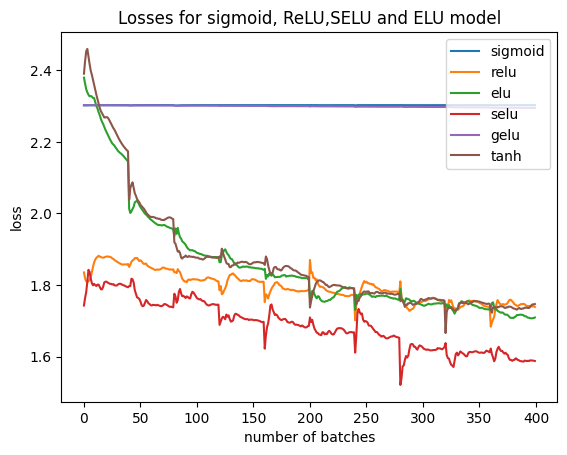

In [39]:
plt.plot(np.arange(len(history_sigmoid.losses)), history_sigmoid.losses, label='sigmoid')
plt.plot(np.arange(len(history_relu.losses)), history_relu.losses, label='relu')
plt.plot(np.arange(len(history_elu.losses)), history_elu.losses, label='elu')
plt.plot(np.arange(len(history_selu.losses)), history_selu.losses, label='selu')
plt.plot(np.arange(len(history_gelu.losses)), history_gelu.losses, label='gelu')
plt.plot(np.arange(len(history_tanh.losses)), history_tanh.losses, label='tanh')
plt.title('Losses for sigmoid, ReLU,SELU and ELU model')
plt.xlabel('number of batches')
plt.ylabel('loss')
plt.legend(loc=1)
plt.show()

In [42]:
w_sigmoid = []
w_relu = []
w_selu = []
w_elu = []
w_gelu = []
w_tanh = []
for i in range(len(model_sigmoid.layers)):
    w_sigmoid.append(max(model_sigmoid.layers[i].get_weights()[1]))
    w_relu.append(max(model_relu.layers[i].get_weights()[1]))
    w_selu.append(max(model_selu.layers[i].get_weights()[1]))
    w_elu.append(max(model_elu.layers[i].get_weights()[1]))
    w_gelu.append(max(model_gelu.layers[i].get_weights()[1]))
    w_tanh.append(max(model_tanh.layers[i].get_weights()[1]))
print(w_sigmoid)
print(w_relu)
print(w_elu)
print(w_selu)
print(w_gelu)
print(w_tanh)


[1.5086388e-07, 1.5376125e-07, 7.232938e-07, 3.4726495e-06, 1.6358035e-05, 5.999103e-05, 0.0002276912, 0.0011655451, 0.012500706]
[0.0042620567, 0.004650517, 0.0055086673, 0.0089919, 0.009474755, 0.012576841, 0.017634675, 0.047351126, 0.04876501]
[0.002279935, 0.002421284, 0.0022173512, 0.0024215444, 0.0025180841, 0.0028567482, 0.0025171686, 0.0040754597, 0.009084693]
[0.003636103, 0.002266176, 0.0023974448, 0.0028529547, 0.002259522, 0.0031305582, 0.003844422, 0.0020166344, 0.016891267]
[0.00023673435, 0.00028375137, 0.00034814814, 0.0003743391, 0.0004831712, 0.0008197293, 0.0013997896, 0.002659758, 0.0077567594]
[0.002385496, 0.001843687, 0.0016711203, 0.0014676527, 0.0017271765, 0.0017840847, 0.0021530753, 0.0032360873, 0.0075456835]


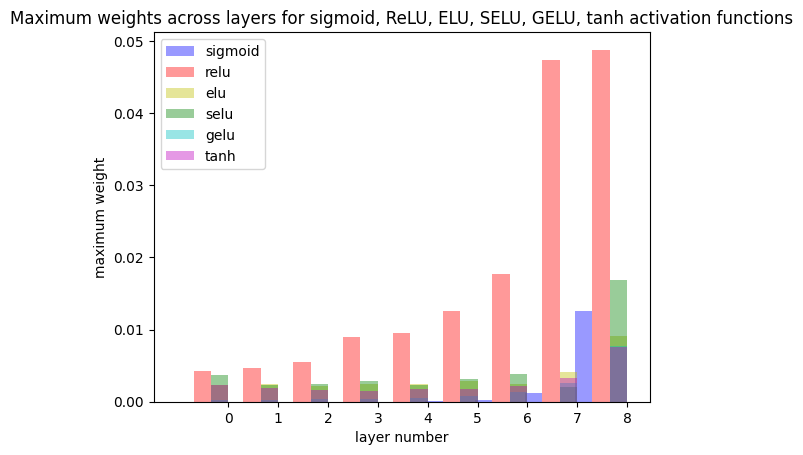

In [47]:
fig, ax = plt.subplots()
index = np.arange(len(model_sigmoid.layers))
bar_width = 0.35
plt.bar(index, w_sigmoid, bar_width, label='sigmoid', color='b', alpha=0.4)
plt.bar(index + bar_width, w_relu, bar_width, label='relu', color='r', alpha=0.4)
plt.bar(index + bar_width + bar_width, w_elu, bar_width, label='elu', color='y', alpha=0.4)
plt.bar(index + bar_width + bar_width, w_selu, bar_width, label='selu', color='g', alpha=0.4)
plt.bar(index + bar_width + bar_width, w_gelu, bar_width, label='gelu', color='c', alpha=0.4)
plt.bar(index + bar_width + bar_width, w_tanh, bar_width, label='tanh', color='m', alpha=0.4)
plt.title('Maximum weights across layers for sigmoid, ReLU, ELU, SELU, GELU, tanh activation functions')
plt.xlabel('layer number')
plt.ylabel('maximum weight')
plt.legend(loc=0)
plt.xticks(index + 2.5*bar_width, np.arange(9))
plt.show()